<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Read-Business-dataset" data-toc-modified-id="Read-Business-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read Business dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#There-are-some-businesses-with-only-1-category,-some-with-37" data-toc-modified-id="There-are-some-businesses-with-only-1-category,-some-with-37-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>There are some businesses with only 1 category, some with 37</a></span></li><li><span><a href="#Keep-only-businesses-with-Restaurants-/-Food-/-Nightlife-as-one-of-the-categories" data-toc-modified-id="Keep-only-businesses-with-Restaurants-/-Food-/-Nightlife-as-one-of-the-categories-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Keep only businesses with Restaurants / Food / Nightlife as one of the categories</a></span></li><li><span><a href="#Let's-call-it-df_fb-for-food-&amp;-beverage-businesses" data-toc-modified-id="Let's-call-it-df_fb-for-food-&amp;-beverage-businesses-1.0.3"><span class="toc-item-num">1.0.3&nbsp;&nbsp;</span>Let's call it df_fb for food &amp; beverage businesses</a></span></li></ul></li></ul></li><li><span><a href="#Loading-Review-dataset-in-chunks" data-toc-modified-id="Loading-Review-dataset-in-chunks-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading Review dataset in chunks</a></span></li><li><span><a href="#For-each-cuisine-required,-output-the-subset-of-concatenated-reviews" data-toc-modified-id="For-each-cuisine-required,-output-the-subset-of-concatenated-reviews-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>For each cuisine required, output the subset of concatenated reviews</a></span></li><li><span><a href="#Convert-a-dataframe-of-all-cuisine-reveiws-into-Tf-Idf-Document-Term-Matrix" data-toc-modified-id="Convert-a-dataframe-of-all-cuisine-reveiws-into-Tf-Idf-Document-Term-Matrix-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Convert a dataframe of all cuisine reveiws into Tf-Idf Document Term Matrix</a></span></li><li><span><a href="#Calculate-cosine-similarity-for-all-pairs" data-toc-modified-id="Calculate-cosine-similarity-for-all-pairs-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Calculate cosine similarity for all pairs</a></span></li><li><span><a href="#Recommend-Cuisines-to-100-Customers" data-toc-modified-id="Recommend-Cuisines-to-100-Customers-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Recommend Cuisines to 100 Customers</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Import-Order-Data" data-toc-modified-id="Import-Order-Data-6.0.1"><span class="toc-item-num">6.0.1&nbsp;&nbsp;</span>Import Order Data</a></span></li></ul></li></ul></li><li><span><a href="#Areas-for-Improvement" data-toc-modified-id="Areas-for-Improvement-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Areas for Improvement</a></span></li></ul></div>

# Read Business dataset 

In [1]:
import pandas as pd

review_json_path = '../data/yelp_academic_dataset_review.json'
business_json_path = '../data/yelp_academic_dataset_business.json'

df_b = pd.read_json(business_json_path, lines=True)

In [2]:
df_b.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment...","{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0..."


In [3]:
# 1 = open, 0 = closed
df_b = df_b[df_b['is_open']==1]

In [4]:
df_b.size

1725472

In [5]:
to_drop = ['address','state','postal_code','latitude','longitude','hours','is_open','stars']
df_b = df_b.drop(to_drop, axis=1)

In [6]:
df_b.attributes

0         {'RestaurantsTableService': 'True', 'WiFi': 'u...
1         {'RestaurantsTakeOut': 'True', 'RestaurantsAtt...
2         {'BusinessAcceptsCreditCards': 'True', 'Restau...
3         {'RestaurantsPriceRange2': '1', 'BusinessAccep...
4         {'GoodForKids': 'False', 'BusinessParking': '{...
                                ...                        
160578               {'BusinessAcceptsCreditCards': 'True'}
160579               {'BusinessAcceptsCreditCards': 'True'}
160580                                                 None
160581    {'RestaurantsTakeOut': 'True', 'RestaurantsPri...
160583    {'RestaurantsTakeOut': 'True', 'RestaurantsDel...
Name: attributes, Length: 123248, dtype: object

In [7]:
df_b.categories.isnull().sum()

100

In [8]:
df_b = df_b[df_b.categories.notna()]

In [9]:
df_b['cat_list'] =  df_b.categories.str.split(', ')

In [10]:
df_b['num_categories'] =  df_b.categories.str.split(', ').map(len)

In [11]:
df_b.head(5)

,business_id,name,city,review_count,attributes,categories,cat_list,num_categories
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,Boulder,86,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","[Gastropubs, Food, Beer Gardens, Restaurants, ...",9
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,Portland,126,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","[Salad, Soup, Sandwiches, Delis, Restaurants, ...",7
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,Portland,13,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment...","[Antiques, Fashion, Used, Vintage & Consignmen...",7
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,Orange City,8,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons","[Beauty & Spas, Hair Salons]",2
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,Atlanta,14,"{'GoodForKids': 'False', 'BusinessParking': '{...","Gyms, Active Life, Interval Training Gyms, Fit...","[Gyms, Active Life, Interval Training Gyms, Fi...",4


### There are some businesses with only 1 category, some with 37 

In [12]:
df_b['num_categories'].describe()

count    123148.000000
mean          4.490654
std           2.268107
min           1.000000
25%           3.000000
50%           4.000000
75%           6.000000
max          37.000000
Name: num_categories, dtype: float64

In [13]:
df_b.size

985184

### Keep only businesses with Restaurants / Food / Nightlife as one of the categories

In [14]:
df_explode = df_b.assign(categories = df_b.cat_list).explode('categories')

In [15]:
df_explode.head(2)

,business_id,name,city,review_count,attributes,categories,cat_list,num_categories
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,Boulder,86,"{'RestaurantsTableService': 'True', 'WiFi': 'u...",Gastropubs,"[Gastropubs, Food, Beer Gardens, Restaurants, ...",9
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,Boulder,86,"{'RestaurantsTableService': 'True', 'WiFi': 'u...",Food,"[Gastropubs, Food, Beer Gardens, Restaurants, ...",9


In [16]:
print("Total number of categories: ", len(df_explode.categories.value_counts()))
print("Top 10 categories:")
df_explode.categories.value_counts()[:10]

Total number of categories:  1316
Top 10 categories:


Restaurants                  32022
Food                         20418
Shopping                     20309
Home Services                14795
Health & Medical             13630
Beauty & Spas                13569
Local Services               10677
Automotive                    8886
Event Planning & Services     7856
Nightlife                     7829
Name: categories, dtype: int64

### Let's call it df_fb for food & beverage businesses 

In [17]:
df_fb = df_b[df_b['categories'].str.contains('Restaurants|Nightlife|Food')]

In [19]:
df_fb.head(4)

,business_id,name,city,review_count,attributes,categories,cat_list,num_categories
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,Boulder,86,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","[Gastropubs, Food, Beer Gardens, Restaurants, ...",9
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,Portland,126,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","[Salad, Soup, Sandwiches, Delis, Restaurants, ...",7
5,D4JtQNTI4X3KcbzacDJsMw,Bob Likes Thai Food,Vancouver,169,"{'GoodForKids': 'True', 'Alcohol': 'u'none'', ...","Restaurants, Thai","[Restaurants, Thai]",2
7,jFYIsSb7r1QeESVUnXPHBw,Boxwood Biscuit,Columbus,11,None,"Breakfast & Brunch, Restaurants","[Breakfast & Brunch, Restaurants]",2


# Loading Review dataset in chunks

In [20]:
size = 1000000
review = pd.read_json(review_json_path, lines=True,
                      dtype={'review_id':str,'user_id':str,
                             'business_id':str,'stars':int,
                             'date':str,'text':str,'useful':int,
                             'funny':int,'cool':int},
                      chunksize=size)

In [21]:
chunk_list = []
for chunk_review in review:
    
    # drop columns that aren't needed
    chunk_review = chunk_review.drop(['review_id','useful','funny','cool'], axis=1)
    
    # renaming column name to avoid conflict with business overall star rating
    chunk_review = chunk_review.rename(columns={'stars': 'review_stars'})
    
    # keep only 3 star reviews and above
    # https://rpubs.com/Belethia/108750#s2_1 found that only +ve reviews tend to talk about food, ingredients themselves
    # So we keep only these reviews that will be useful for measuring cosine similarity between cuisines
    chunk_review = chunk_review[chunk_review.review_stars >= 3]
    
    # inner merge with edited business file so only reviews related to the business remain
    chunk_merged = pd.merge(df_fb, chunk_review, on='business_id', how='inner')
    
    # feedback on progress
    print(f"{chunk_merged.shape[0]} out of {size:,} related reviews")
    
    chunk_list.append(chunk_merged)
    
# concatenate all relevant data back to one dataframe
df = pd.concat(chunk_list, ignore_index=True, join='outer', axis=0)

458003 out of 1,000,000 related reviews
443723 out of 1,000,000 related reviews
450772 out of 1,000,000 related reviews
450439 out of 1,000,000 related reviews
441251 out of 1,000,000 related reviews
450514 out of 1,000,000 related reviews
450094 out of 1,000,000 related reviews
446095 out of 1,000,000 related reviews
282068 out of 1,000,000 related reviews


In [22]:
len(df)

3872959

In [23]:
df.head(2)

,business_id,name,city,review_count,attributes,categories,cat_list,num_categories,user_id,review_stars,text,date
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,Boulder,86,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","[Gastropubs, Food, Beer Gardens, Restaurants, ...",9,93z0yh-sUpGZS-cSKu6xxA,5,Stopped in on a busy Friday night. Despite the...,2018-03-04 00:59:21
1,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,Boulder,86,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","[Gastropubs, Food, Beer Gardens, Restaurants, ...",9,rqxTSFFj5fZNmabY1fmTlw,5,This was the place the be on Friday Night! If ...,2018-03-17 14:22:48


# For each cuisine required, output the subset of concatenated reviews

For future use/reference, this might be useful to have the individual file level

In [30]:
search_terms = ["Fast Food", "American", "Sandwich", "Pizza", "Burgers", "American|European", 
"Cake|Bake", "Dessert", "Juice|Drinks|Smoothies|Shakes", "Halal", "Chicken", "Seafood", 
"Vegetarian", "Health", "Chinese", "Thai", "Indian", "Indonesian", "Filipino", "Asian", "Vietnamese", 
"Malay", "Malaysian", "Singaporean", "Portuguese", "Japanese", "Sushi", "Korean", 
"African|South American|European", "Italian", "French", "European", "German", "Mexican", 
"Turkish", "Middle Eastern", "Mediterranean"]

In [31]:
file_names = ["Fast Food", "American", "Sandwiches", "Pizza", "Burgers", "Western", 
"Cake & Bakery", "Desserts", "Non-alcoholic Drinks", "Halal", "Chicken", "Seafood", 
"Vegetarian", "Healthy Food", "Chinese", "Thai", "Indian", "Indonesian", "Filipino", "Asian", "Vietnamese", 
"Malay", "Malaysian", "Singaporean", "Melaka Portuguese", "Japanese", "Sushi", "Korean", 
"International", "Italian", "French", "European", "German", "Mexican", 
"Turkish", "Middle Eastern", "Mediterranean"]

In [36]:
for i in range(37):
    df[df.categories.str.contains(search_terms[i])].text.to_csv(f'data/{file_names[i]}.txt', 
                                                               sep='\n', index=False, header=False)

# Convert a dataframe of all cuisine reveiws into Tf-Idf Document Term Matrix

In [206]:
from collections import defaultdict
from pathlib import Path


In [41]:
data_path = "data"

input_data = defaultdict(list)

for file in Path(data_path).iterdir():
    with open(file, "r") as file_open:
        input_data["Cuisine"].append(file.name)
        input_data["Text"].append(file_open.read())
        
text_data = pd.DataFrame(input_data)

In [42]:
text_data.head(5)

,Cuisine,Text
0,Filipino.txt,We just moved to Oregon from San Diego and we'...
1,Indonesian.txt,"""I went here last Sunday (Aug 3rd) and their f..."
2,German.txt,"""I went there tonight for my second time. I ju..."
3,Japanese.txt,"""""""We'll cross that bridge when we get there.""..."
4,Fast Food.txt,I have always had great food and great service...


In [44]:
text_data['Cuisine'] = text_data['Cuisine'].str.replace(r'.txt$', '')

In [45]:
text_data.head(2)

,Cuisine,Text
0,Filipino,We just moved to Oregon from San Diego and we'...
1,Indonesian,"""I went here last Sunday (Aug 3rd) and their f..."


In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/spatika/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [58]:
vectorizer = TfidfVectorizer(stop_words = stopwords.words('english')) 
# Tfidf removes punctuation/special characters

In [65]:
tfidf_dtm = vectorizer.fit_transform(text_data.Text)

In [66]:
tfidf_dtm

<37x404641 sparse matrix of type '<class 'numpy.float64'>'
	with 2395870 stored elements in Compressed Sparse Row format>

In [67]:
print(tfidf_dtm.shape)

(37, 404641)


# Calculate cosine similarity for all pairs

In [71]:
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
import time 

# Record start time
start = time.time()

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_dtm, tfidf_dtm)

# Print cosine similarity matrix
print(cosine_sim)

# Print time taken
print("Time taken: %s seconds" % (time.time() - start))

[[1.         0.82878947 0.76096769 ... 0.85281532 0.83931824 0.82750901]
 [0.82878947 1.         0.771847   ... 0.88087169 0.86350412 0.86177826]
 [0.76096769 0.771847   1.         ... 0.87774675 0.8117064  0.86943687]
 ...
 [0.85281532 0.88087169 0.87774675 ... 1.         0.92211148 0.954212  ]
 [0.83931824 0.86350412 0.8117064  ... 0.92211148 1.         0.90373023]
 [0.82750901 0.86177826 0.86943687 ... 0.954212   0.90373023 1.        ]]
Time taken: 0.3901939392089844 seconds


<AxesSubplot:>

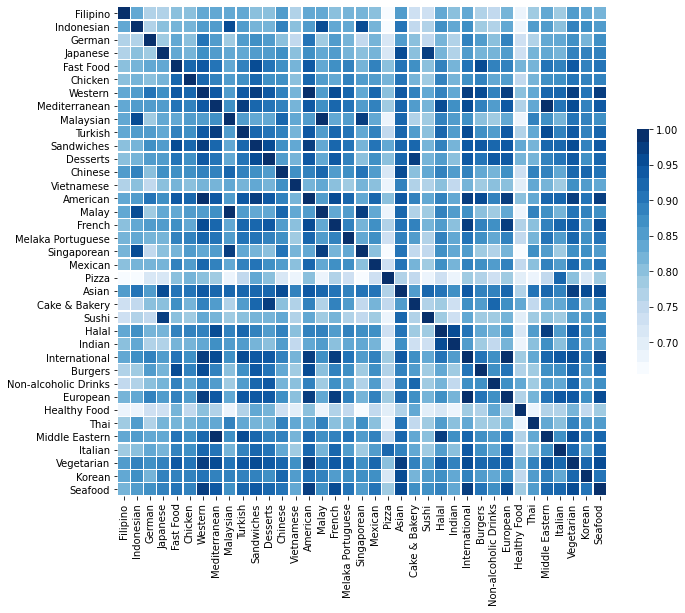

In [87]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

mask = np.triu(np.ones_like(cosine_sim, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)


sns.heatmap(cosine_sim, square=True, cmap=cm.get_cmap('Blues', 20), 
            vmax=1.0, linewidths=.5, cbar_kws={"shrink": .5},
            yticklabels=text_data.Cuisine,xticklabels=text_data.Cuisine)

# Recommend Cuisines to 100 Customers

Recommend top 3 cuisines for customers based on the 2 cuisines they order from the most

### Import Order Data

In [172]:
order_data = pd.read_excel('data/Order_Data.xlsx')

In [173]:
order_data.head(10)

,cuisine,Numbers of order,Customer_id
0,Fast Food,10,1
1,Cakes & Bakery,2,1
2,Western,1,1
3,Non-alcoholic Drinks,1,1
4,Chinese,4,1
5,Pizza,5,1
6,Thai,1,1
7,Indian,1,1
8,American,2,1
9,Vietnamese,2,1


In [175]:
order_data.cuisine.replace('Cakes & Bakery', 'Cake & Bakery', inplace=True)

In [176]:
top_cuisine = order_data.loc[order_data.groupby('Customer_id')['Numbers of order'].idxmax()]

In [177]:
top_cuisine.rename(columns={'cuisine':'Top_Cuisine'},inplace=True)

In [178]:
cuisines_list = order_data.groupby('Customer_id')['cuisine'].apply(','.join)

In [179]:
cuisines_list = cuisines_list.to_frame().reset_index()

In [180]:
top_cuisine = top_cuisine.merge(cuisines_list,how='inner',left_on='Customer_id', right_on='Customer_id')

In [181]:
top_cuisine

,Top_Cuisine,Numbers of order,Customer_id,cuisine
0,Fast Food,10,1,"Fast Food,Cake & Bakery,Western,Non-alcoholic ..."
1,Singaporean,14,2,"American,Fast Food,Japanese,Western,Singaporea..."
2,Chinese,6,3,"Halal,Italian,Healthy Food,Burgers,Western,Chi..."
3,Singaporean,11,4,"Fast Food,Cake & Bakery,Melaka Portuguese,Chin..."
4,Indian,10,5,"American,Fast Food,Singaporean,Western,Chinese..."
...,...,...,...,...
95,Chinese,25,96,"Fast Food,Chinese,American,Singaporean,Turkish..."
96,International,24,97,"International,Japanese,Pizza,American,Italian,..."
97,Chinese,12,98,"Fast Food,Singaporean,Pizza,Chinese,Desserts,W..."
98,Chinese,13,99,"Desserts,Fast Food,Singaporean,Non-alcoholic D..."


In [182]:
list_Cuisine = list(text_data.Cuisine)

In [183]:
def get_recs(row):
    top_3 = []
    
    # recs should not be in this list already
    cust_cuisine_list = row.cuisine.split(',')
    
    # find indices of cuisines customer has already eaten in
    cust_cuisine_idx = []
    
    for cuisine in cust_cuisine_list:
        idx_cuisine = list_Cuisine.index(cuisine)
        cust_cuisine_idx.append(idx_cuisine)
    
    cust_top_cuisine = row.Top_Cuisine
    
    # find the index of the top cuisine and it's cosine similarities with all other cuisines
    idx_top_cuisine = list_Cuisine.index(cust_top_cuisine)
    cosine_sim_row = cosine_sim[idx_top_cuisine]
    
    cosine_sim_df = pd.DataFrame(cosine_sim_row, columns=['Similarity Values']).sort_values(by='Similarity Values', ascending=False)
    
    # subset the dataframe such that cuisines are not in cust_cuisine_list
    cosine_sim_df = cosine_sim_df[~cosine_sim_df.index.isin(cust_cuisine_idx)]
    
    top_3_indices = list(cosine_sim_df.index[0:3])
    
    top_3 = [list_Cuisine[i] for i in top_3_indices]
    
    return top_3

In [184]:
cuisine_recs = top_cuisine.apply(get_recs, axis=1)

In [191]:
cuisine_recs = cuisine_recs.to_frame(name='Cuisine Recs').reset_index()

In [192]:
cuisine_recs = cuisine_recs.rename(columns={'index':'Customer_id'})

In [193]:
cuisine_recs['Customer_id'] = cuisine_recs['Customer_id'] + 1

In [194]:
cuisine_recs

,Customer_id,Cuisine Recs
0,1,"[Sandwiches, Burgers, Vegetarian]"
1,2,"[Malay, Indonesian, Asian]"
2,3,"[Asian, Malaysian, Malay]"
3,4,"[Malay, Malaysian, Indonesian]"
4,5,"[Halal, Vegetarian, Middle Eastern]"
...,...,...
95,96,"[Asian, Korean, Malaysian]"
96,97,"[European, French, Seafood]"
97,98,"[Asian, Malaysian, Malay]"
98,99,"[Korean, Malaysian, Malay]"


In [202]:
print(top_cuisine.cuisine[2])
print(top_cuisine.Top_Cuisine[2])

Halal,Italian,Healthy Food,Burgers,Western,Chinese,Japanese,European,Singaporean,Thai,Cake & Bakery,Desserts,Chicken,Vietnamese,Indian,Korean,American
Chinese


# Areas for Improvement
1. Cosine Similarity ranges from 0.7 to 1.0 which shows pretty high correlation between most cuisines and doesn't necessarily reflect reality: this could be because Yelp businesses are tagged to multiple categories (anywhere from 1 to 37 as we saw) - so a review could end up in the same cuisine if it is for business A's first category, but also if it is for business B's 10th category
    - I purposely maintained all categories so as not to cut down on reviews for some of the already limited categories, but if we first truncate categories list for all businesses to the top 3-5, we may have less overlap of reviews and a wider (more accurate) cosine similarity range
    - Also, we still cannot be sure that the top 3-4 are the primary cuisines of a business, but this is still something to keep in mind
    - Instead of purely cosine similarity, we can also use LDA topic modelling, and the resulting document-topic distribution as features as done in [this R analysis](https://rpubs.com/Belethia/117506)
    
&nbsp;
  
2. Ingredients list might be more appropriate for this purpose: combine ingredients from several recipes tagged to a particular cuisine, and use this ingredient compilation to build the Tf-Idf vectors instead 
    - There is an ingredients-cuisine dataset [from Yummly](https://www.kaggle.com/c/whats-cooking/data?select=train.json.zip), however it is not as exhaustive as the Yelp dataset in the cuisines covered and did not have most of the cuisines that we were interested in 
  
&nbsp;

3. We could also tune the Tf-Idf vectorizer more: 
    - Setting thresholds to exclude terms that are in very few documents/cuisines (min_df), and those that are not unique to any of the documents (max_df)
    - Exclude domain specific stopwords like 'yummy', 'food', 'meal'
    - Include bi-grams or tri-grams - for example, while 'fish' could be common to many cuisines, 'fish sauce' would only be common to a few specific cuisines